# Robot walking on hexagonal track (Thubagere et al, 2017)

Copyright (C) 2024 Matthew Lakin, Sarika Kumar

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program.  If not, see <https://www.gnu.org/licenses/>. 

## Notes

Want to use 0.43 nm per ssDNA nucleotide.

Track has two three-location lines, offset at 60 degrees.

One sink state at the upper right.

In [1]:
from paper_examples import enumerate_robot_cargo
from constants import SS_LENGTH
import math

## Full code below

INPUT STRINGS:
longDomain spcr1 length 6 toeholdDomain foot length 6 longDomain leg length 15 toeholdDomain hand length 6 longDomain arm length 20 toeholdDomain foot2 length 6 longDomain spcr2 length 6 toeholdDomain foot1 length 6 toeholdDomain cargo1 length 6 longDomain spcr3 length 21 longDomain goal1p length 21
([[<tether(0, 0) spcr1 foot^*!i1 leg*!i2 > | <hand^ arm foot2^ leg!i2 foot^!i1>  | <tether(6, 0) spcr2 leg* foot2^*> | <tether(12, 0) spcr2 foot^* leg*>|<tether(3.0, 5.2) spcr2 leg* foot2^*> | <tether(9.0, 5.2) spcr2 foot^* leg*> | <tether(15.0, 5.2) spcr2 foot^* leg* foot2^*>]])

PARAMETERS:
ssDNA length per nucleotide (nm): 0.43
dsDNA length per nucleotide (nm): 0.34
Nick angle upper bound constraints active? True
Nick angle upper bound (degrees): 105

INITIAL SPECIES:
sp_0:


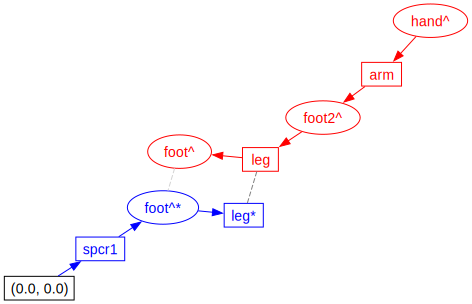

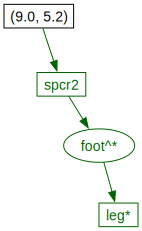

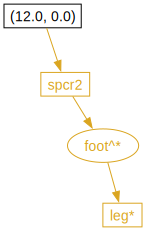

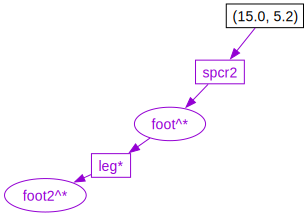

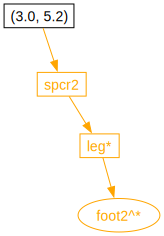

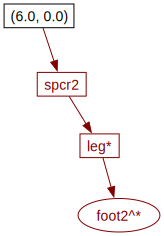


Found 25 species and 30 reactions in total.



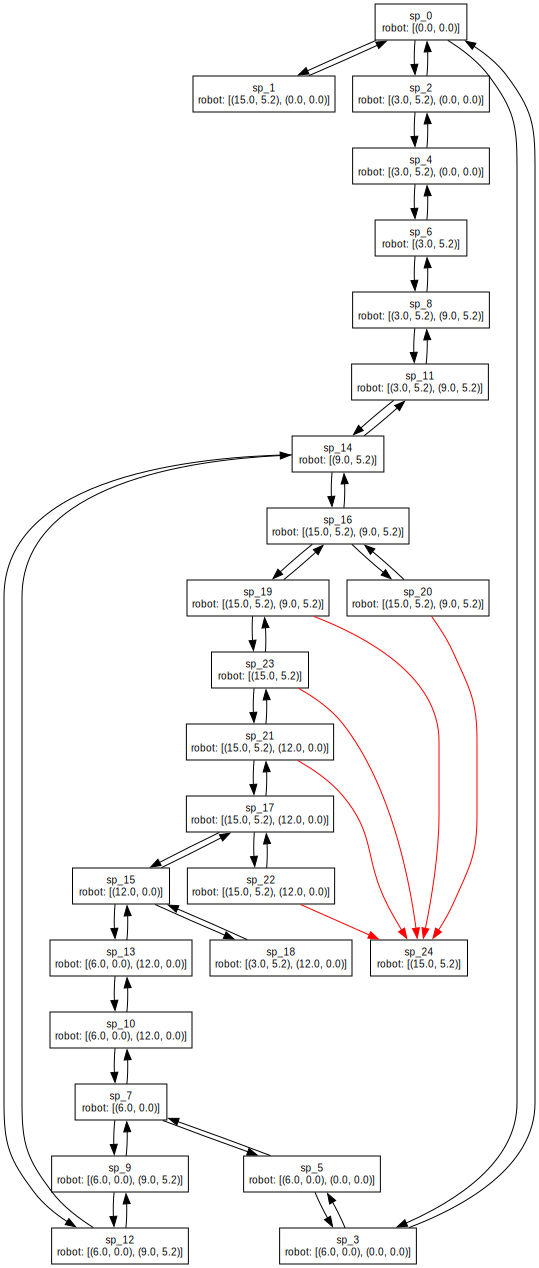

REACTIONS:
REACTION 1: sp_0 @robot:[(0.0, 0.0)] @cargo:[] {0.1}<->{0.003} sp_1 @robot:[(15.0, 5.2), (0.0, 0.0)] @cargo:[]
REACTION 2: sp_0 @robot:[(0.0, 0.0)] @cargo:[] {0.1}<->{0.003} sp_2 @robot:[(3.0, 5.2), (0.0, 0.0)] @cargo:[]
REACTION 3: sp_0 @robot:[(0.0, 0.0)] @cargo:[] {0.1}<->{0.003} sp_3 @robot:[(6.0, 0.0), (0.0, 0.0)] @cargo:[]
REACTION 4: sp_2 @robot:[(3.0, 5.2), (0.0, 0.0)] @cargo:[] {1.0}<->{1.0} sp_4 @robot:[(3.0, 5.2), (0.0, 0.0)] @cargo:[]
REACTION 5: sp_3 @robot:[(6.0, 0.0), (0.0, 0.0)] @cargo:[] {1.0}<->{1.0} sp_5 @robot:[(6.0, 0.0), (0.0, 0.0)] @cargo:[]
REACTION 6: sp_4 @robot:[(3.0, 5.2), (0.0, 0.0)] @cargo:[] {0.003}<->{0.1} sp_6 @robot:[(3.0, 5.2)] @cargo:[]
REACTION 7: sp_5 @robot:[(6.0, 0.0), (0.0, 0.0)] @cargo:[] {0.003}<->{0.1} sp_7 @robot:[(6.0, 0.0)] @cargo:[]
REACTION 8: sp_6 @robot:[(3.0, 5.2)] @cargo:[] {0.1}<->{0.003} sp_8 @robot:[(3.0, 5.2), (9.0, 5.2)] @cargo:[]
REACTION 9: sp_7 @robot:[(6.0, 0.0)] @cargo:[] {0.1}<->{0.003} sp_9 @robot:[(6.0, 0.0), 

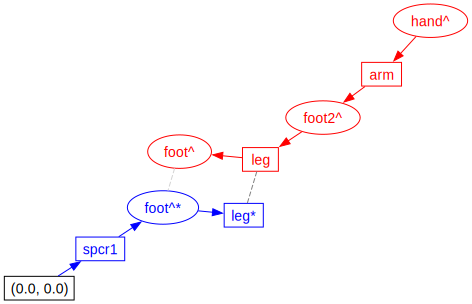

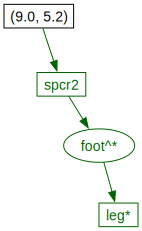

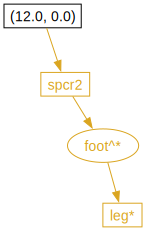

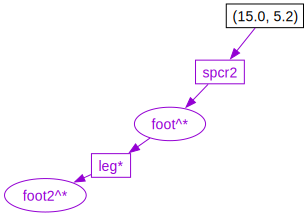

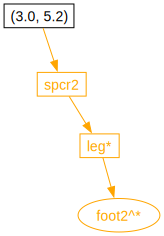

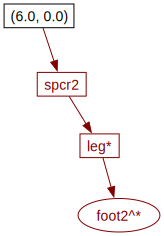

sp_1:


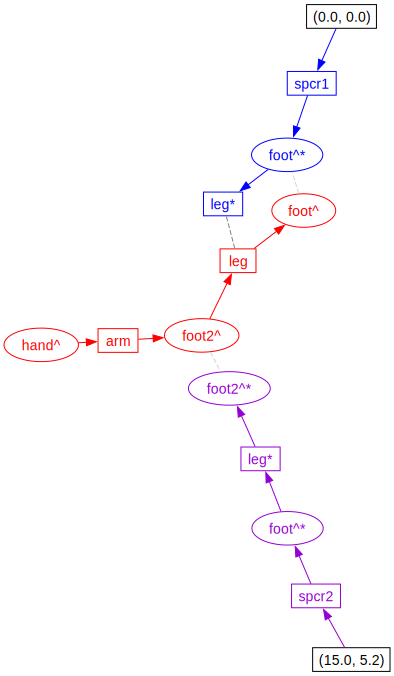

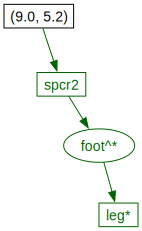

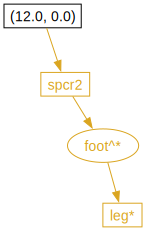

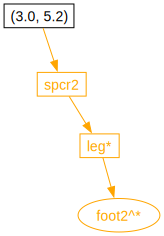

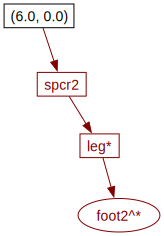

sp_2:


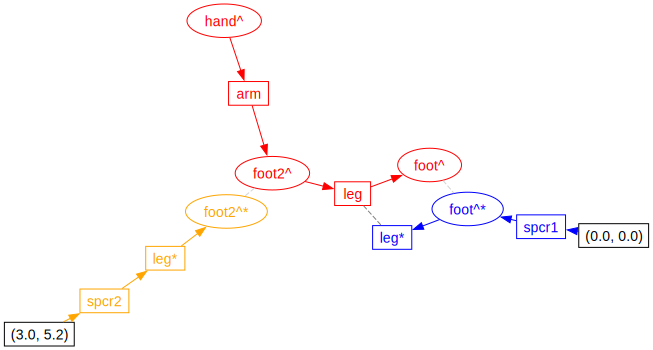

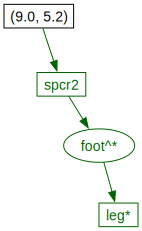

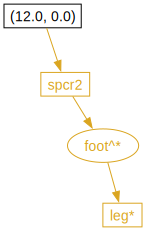

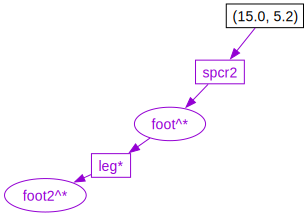

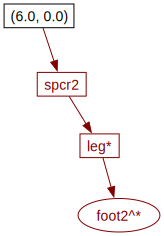

sp_3:


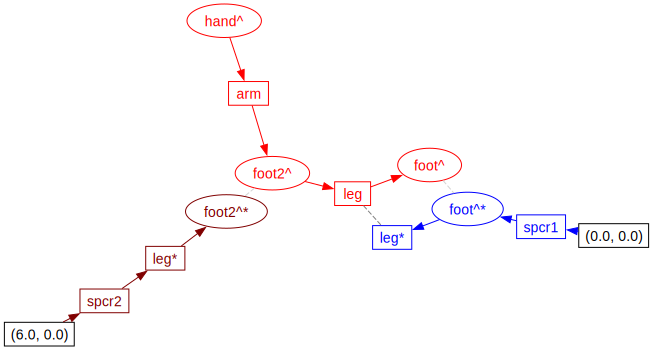

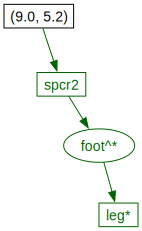

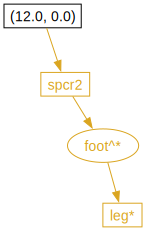

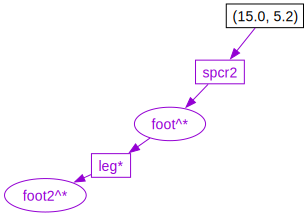

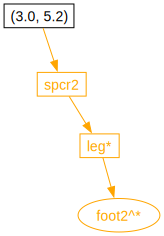

sp_4:


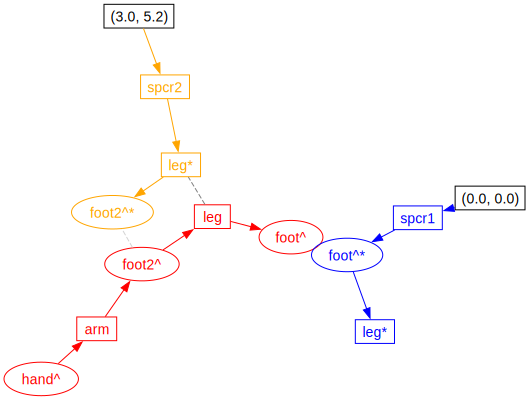

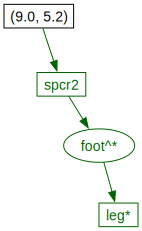

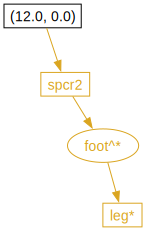

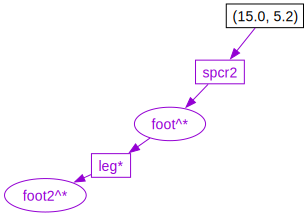

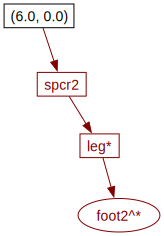

sp_5:


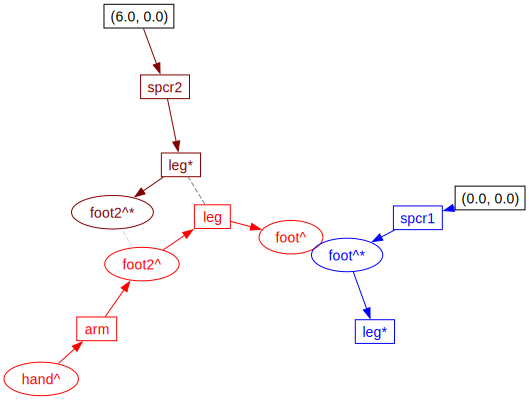

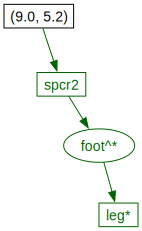

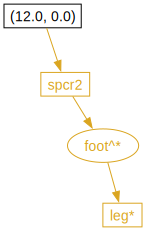

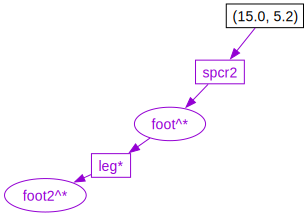

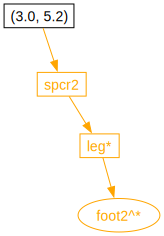

sp_6:


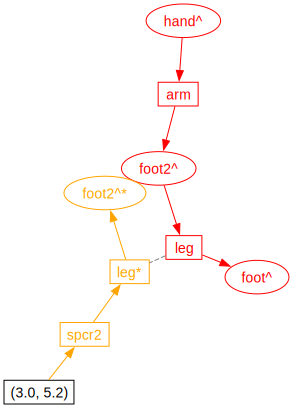

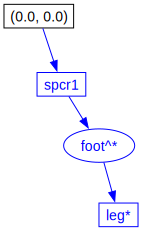

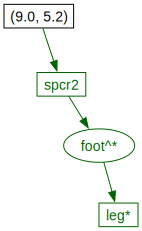

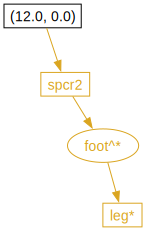

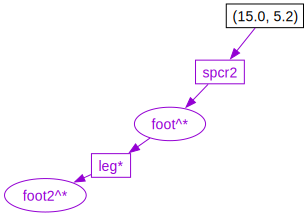

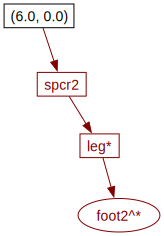

sp_7:


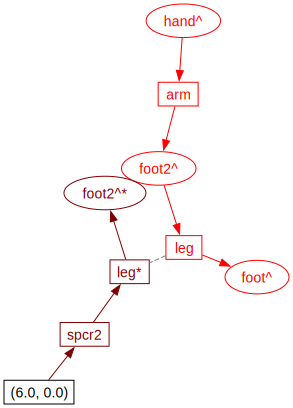

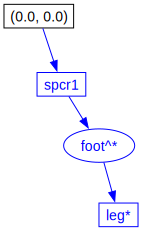

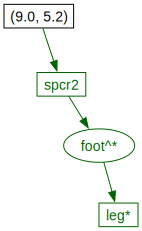

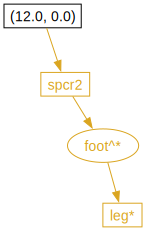

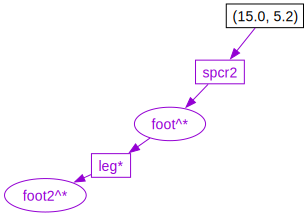

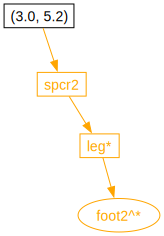

sp_8:


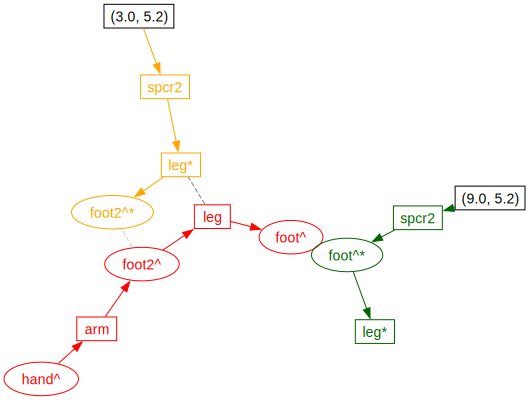

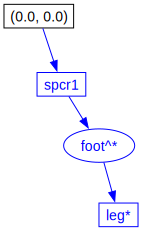

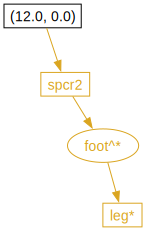

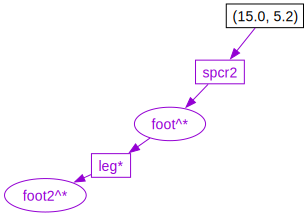

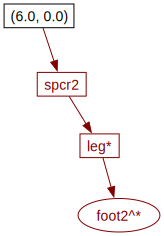

sp_9:


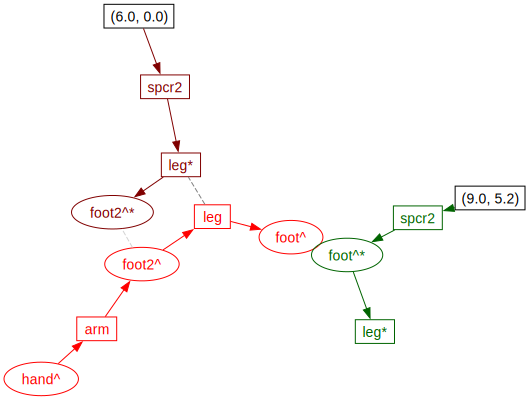

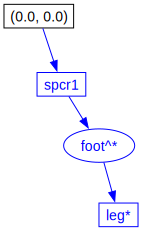

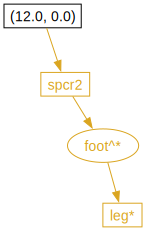

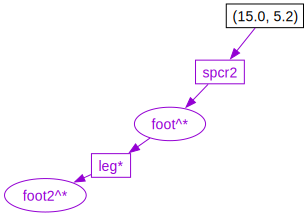

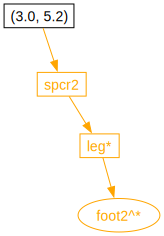

sp_10:


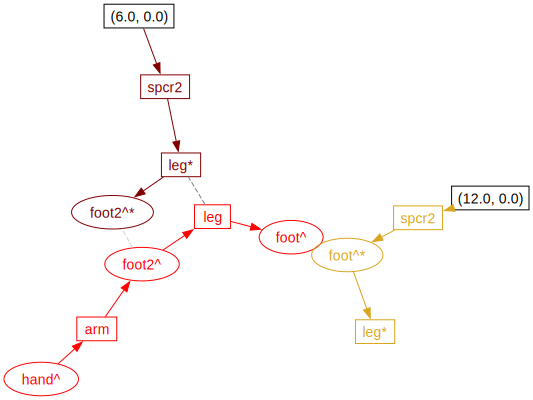

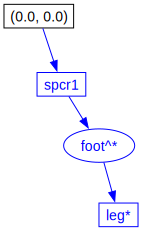

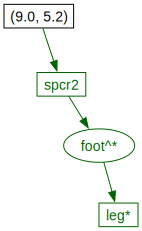

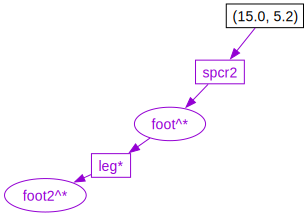

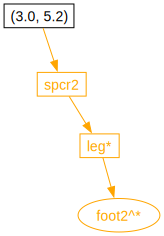

sp_11:


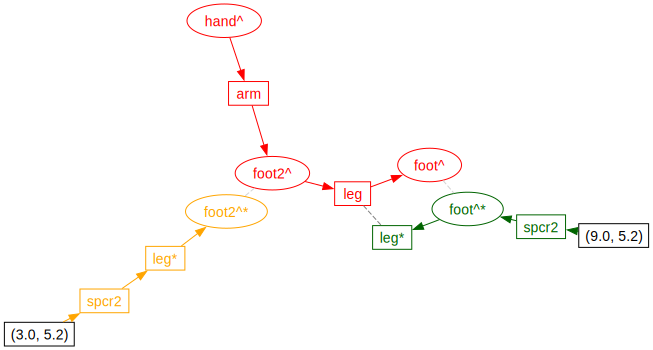

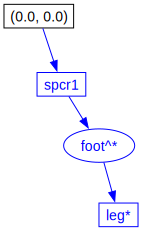

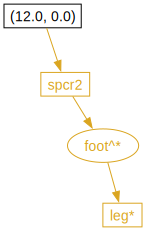

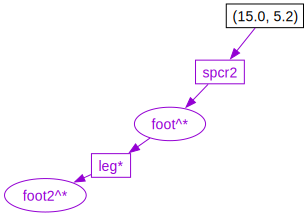

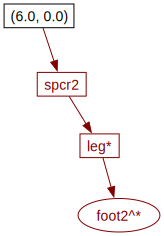

sp_12:


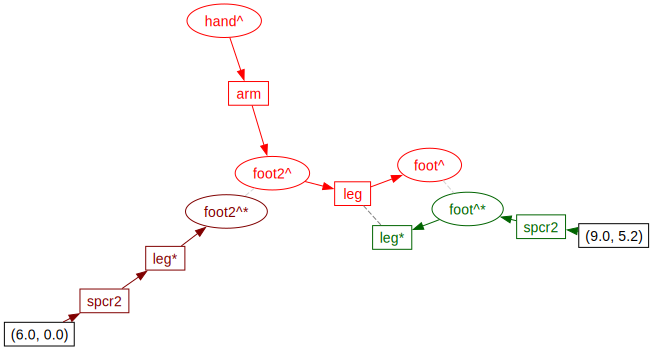

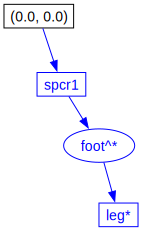

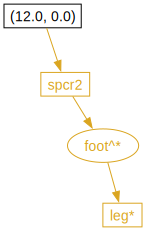

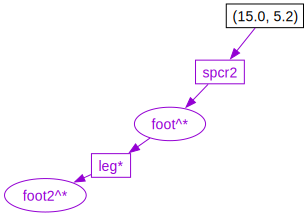

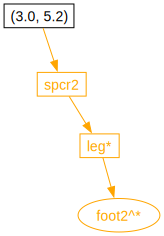

sp_13:


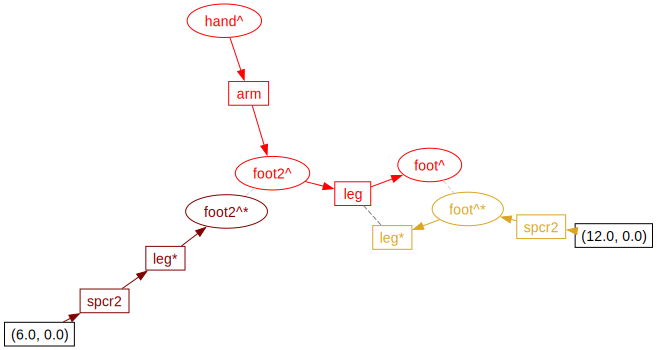

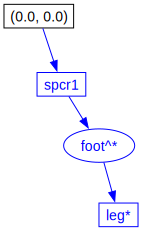

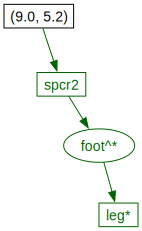

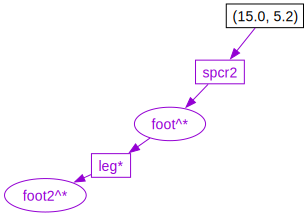

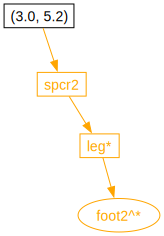

sp_14:


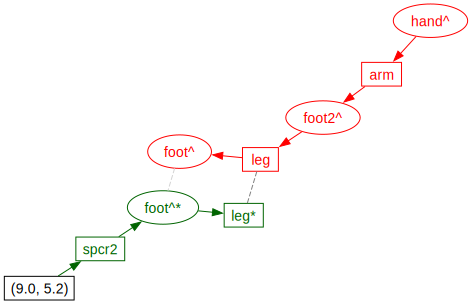

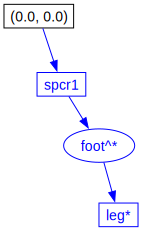

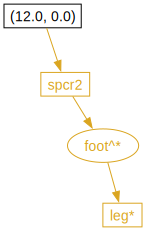

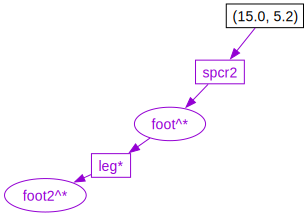

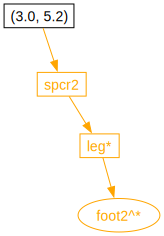

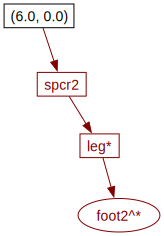

sp_15:


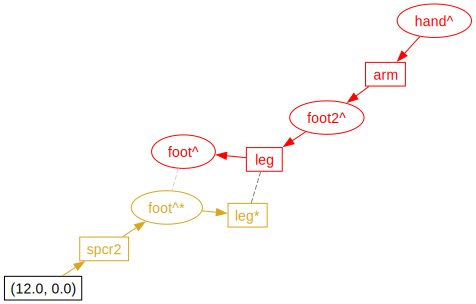

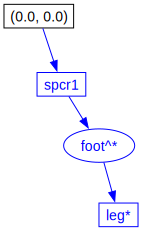

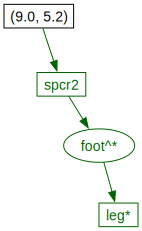

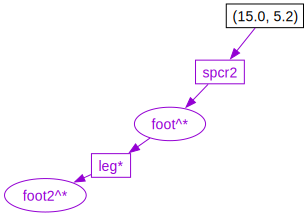

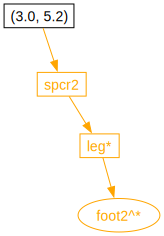

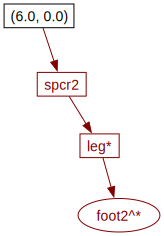

sp_16:


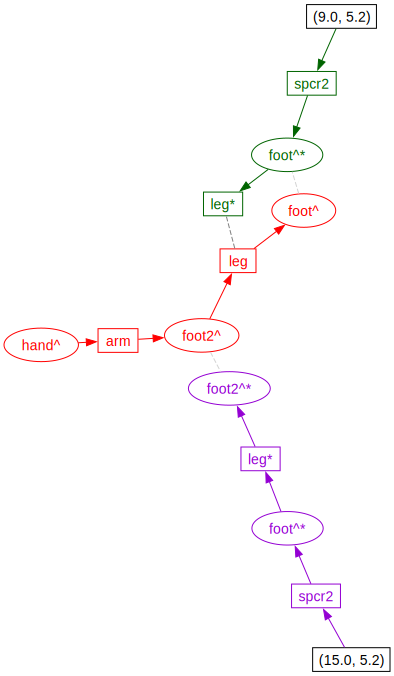

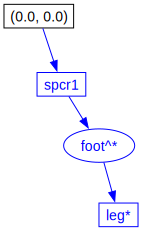

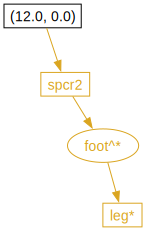

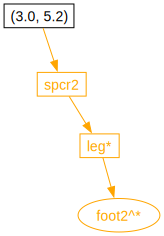

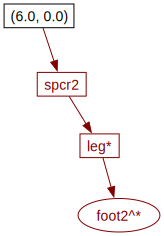

sp_17:


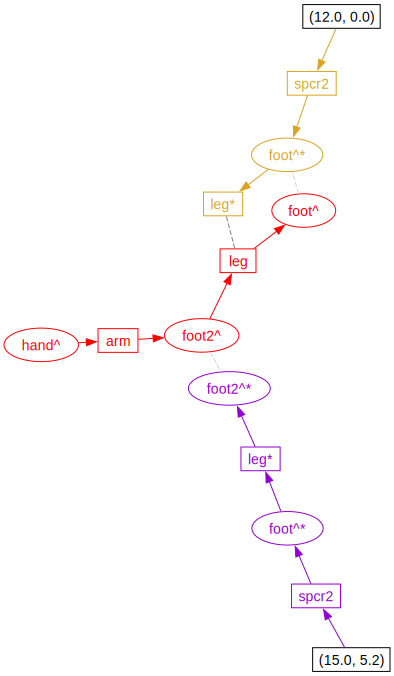

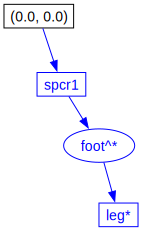

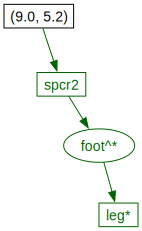

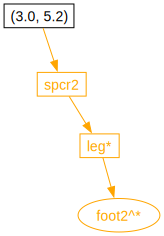

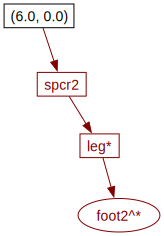

sp_18:


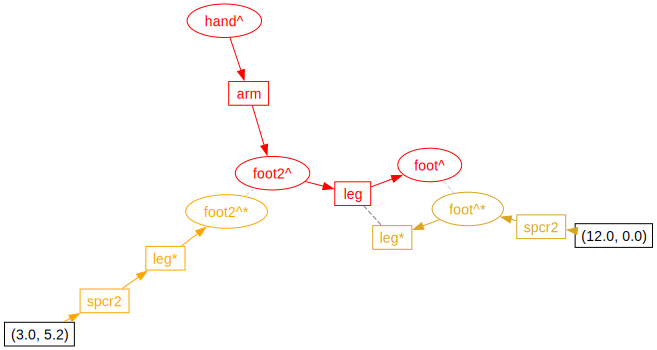

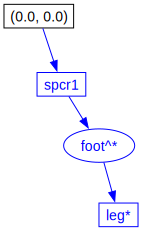

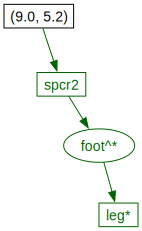

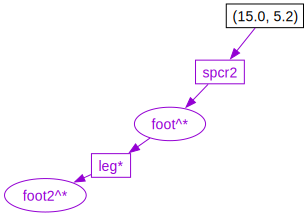

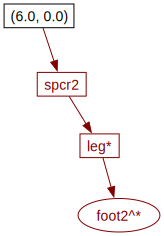

sp_19:


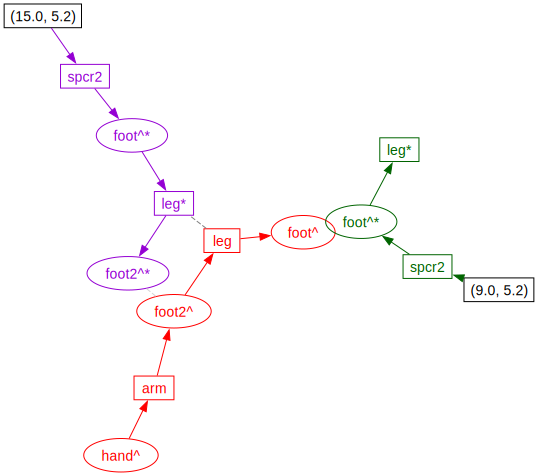

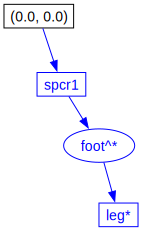

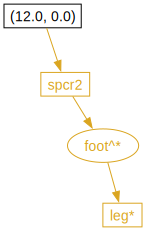

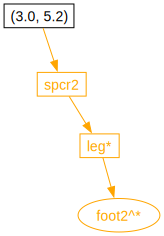

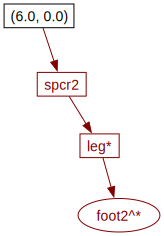

sp_20:


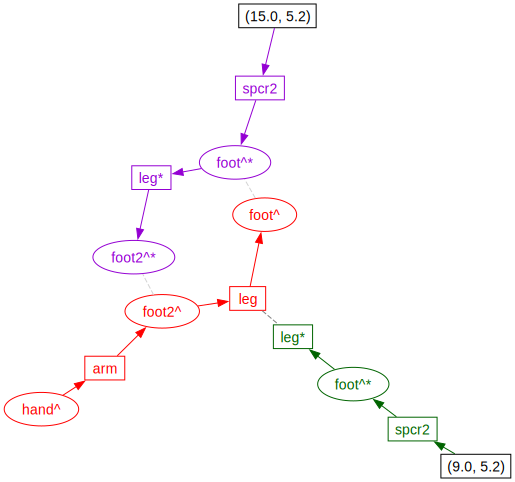

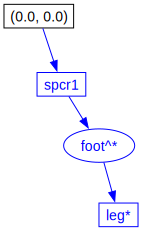

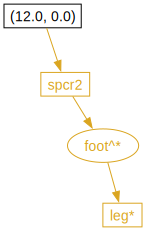

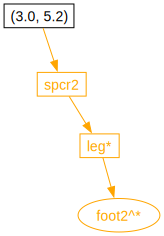

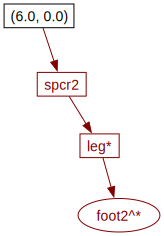

sp_21:


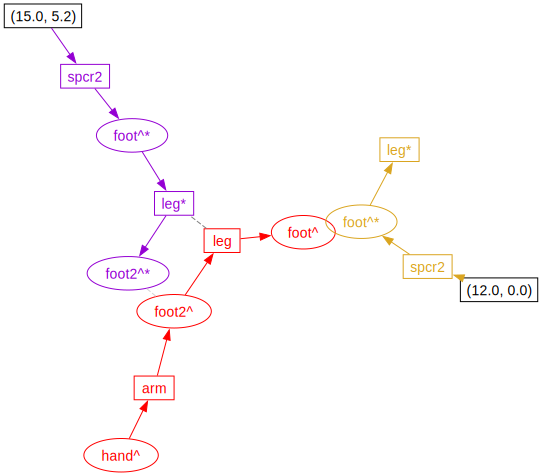

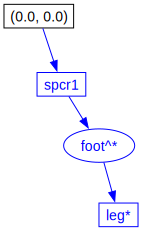

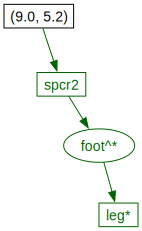

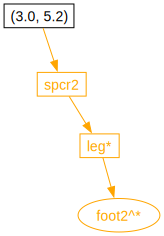

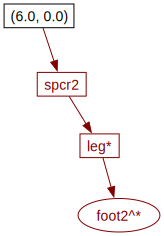

sp_22:


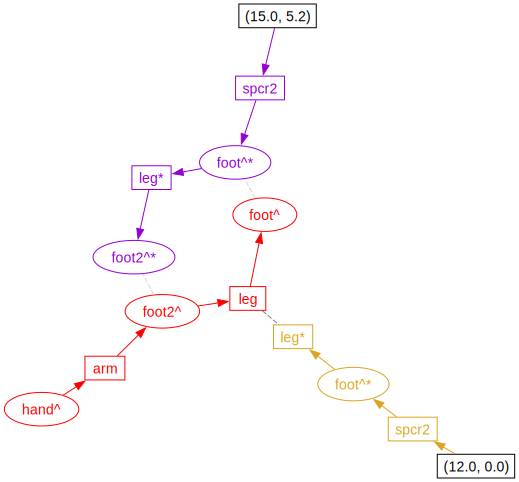

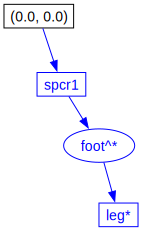

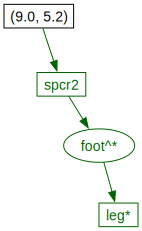

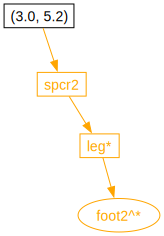

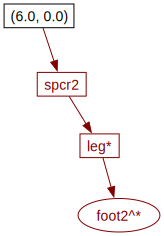

sp_23:


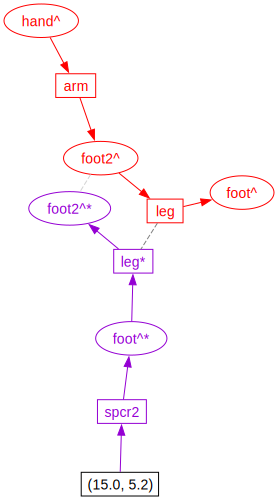

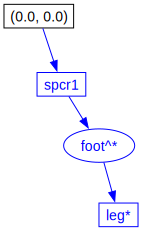

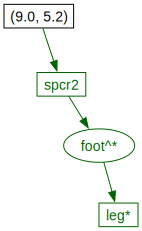

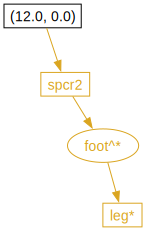

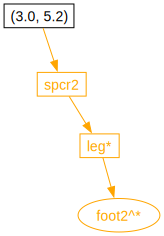

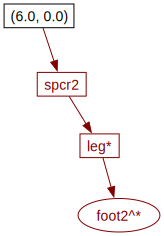

sp_24:


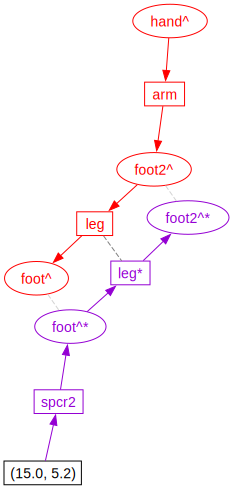

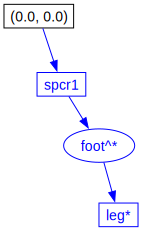

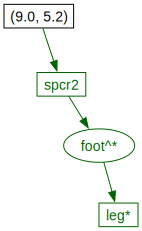

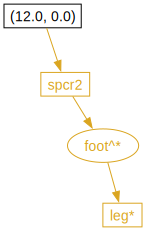

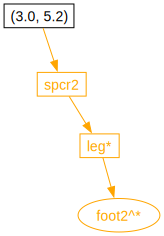

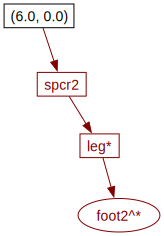

Time taken to enumerate reactions for settings adjacent_detailed: 26.083562916959636 seconds



In [2]:
assert SS_LENGTH == 0.43

robot = '<tether(0, 0) spcr1 foot^*!i1 leg*!i2 > | <hand^ arm foot2^ leg!i2 foot^!i1> '
track1 = ('<tether(6, 0) spcr2 leg* foot2^*> | '
          '<tether(12, 0) spcr2 foot^* leg*>')

def get_track_coordinate(x, d, theta):    
    return (x + round(d * math.cos(theta), 1), round(d* math.sin(theta), 1))
track2_coords = [get_track_coordinate(x, 6, math.pi / 3) for x in [0,6,12]]
track2 = ('<tether'+str(track2_coords[0])+' spcr2 leg* foot2^*> | '
          '<tether'+str(track2_coords[1])+' spcr2 foot^* leg*> | '
          '<tether'+str(track2_coords[2])+' spcr2 foot^* leg* foot2^*>')

domainLengthStr = ('longDomain spcr1 length 6 toeholdDomain foot length 6 longDomain leg length 15 toeholdDomain hand length 6 longDomain arm length 20 toeholdDomain foot2 length 6 ' 
                   'longDomain spcr2 length 6 toeholdDomain foot1 length 6 toeholdDomain cargo1 length 6 longDomain spcr3 length 21 longDomain goal1p length 21')
tethered_system = '([['+ robot + ' | ' + track1 + '|' +track2 +']])'
robot_strand = '(<hand^ arm foot2^ leg foot^>)'
cargo_strand = '(<cargo1^ arm* hand^*>)'

enumerate_robot_cargo(tethered_system, domainLengthStr, robot_strand, cargo_strand)